In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import os
output_dir = "results"

In [11]:
with open(os.path.join(output_dir, "weights"), "rb") as f:
    params = np.load(f,allow_pickle=True)
params[0]

array([0.04354661970204828,
       array([140.49438688, 173.81051596, 248.59245745]),
       array([[1152.72848712,  809.69722652,   -6.59295949],
       [ 809.69722652,  609.37362874,   -2.73934967],
       [  -6.59295949,   -2.73934967,   12.32445266]])], dtype=object)

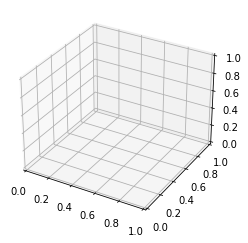

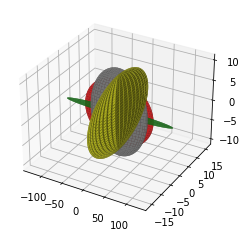

In [37]:
fig = plt.figure()
ax = fig.gca(projection='3d')

def plotGMM(params):

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for param in params:
        scaling, mean, cov = param
        w, v = np.linalg.eig(cov)
        # Define elipsold center
        x_r, y_r, z_r = scaling * w
        # calculate zenith angle
        x_vec, y_vec, z_vec = v.T
        theta = np.arccos(np.clip(np.dot(x_vec, y_vec), -1.0, 1.0))
        phi = np.arccos(np.clip(np.dot(z_vec, [0, 0, 1]), -1.0, 1.0))
        # populate theta and phi
        phi = np.linspace(0, 2 * np.pi, 256).reshape(256, 1)  # the angle of the projection in the xy-plane
        theta = np.linspace(0, np.pi, 256).reshape(-1, 256)  # the angle from the polar axis, ie the polar angle

        x = x_r * np.sin(theta) * np.cos(phi)
        y = y_r * np.sin(theta) * np.sin(phi)
        z = z_r * np.cos(theta)
        ax.plot_surface(x, y, z)
    plt_name = os.path.join(output_dir, "ellipsoid", "ellipsoid_plot")
    if not (os.path.isdir(os.path.join(output_dir, "ellipsoid"))):
        os.mkdir(os.path.join(output_dir, "ellipsoid"))
    fig.savefig(fname=plt_name, dpi=fig.dpi)
    print("Ellipoisd has been saved at /result/ellipsoid/ellipsoid_plot.png")

plotGMM(params)

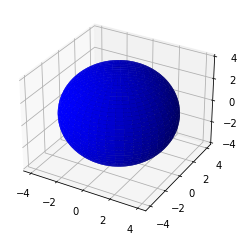

In [ ]:

phi = np.linspace(0,2*np.pi, 256).reshape(256, 1) # the angle of the projection in the xy-plane
theta = np.linspace(0, np.pi, 256).reshape(-1, 256) # the angle from the polar axis, ie the polar angle
radius = 4

# Transformation formulae for a spherical coordinate system.
x = radius*np.sin(theta)*np.cos(phi)
y = radius*np.sin(theta)*np.sin(phi)
z = radius*np.cos(theta)

fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='b')